<a href="https://colab.research.google.com/github/Nlamje45/AI-Projects/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
d=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv", encoding= 'unicode_escape')
d.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Check for missing values

In [4]:
d.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The agent and company columns are having the maximum null values. They contain unique number which is unique id of the agent and company. So we can replace null values with 0

In [5]:
d[['agent','company']] = d[['agent','company']].fillna(0)

We can replace the null values in column children with the overall mean value of the column as the number of null values are low

In [6]:
d['children'].fillna(round(d.children.mean()), inplace=True)

We need to drop rows which contain null values in country column if we had to make predection but since our moto is Exploraory Data Analysis we can replace the country column with the respective mode country

In [7]:
d['country'].fillna(d.country.mode().to_string(), inplace=True)

In [8]:
d.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

We need to drop the rows in which Number of adults + children is zero as it does not make any sense

In [9]:
d = d.drop(d[(d.adults+d.babies+d.children)==0].index)

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [11]:
d[['children', 'company', 'agent']] = d[['children', 'company', 'agent']].astype('int64')

First finding how much booking are canceled

In [12]:
t=d['is_canceled'].value_counts()
t

0    75011
1    44199
Name: is_canceled, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


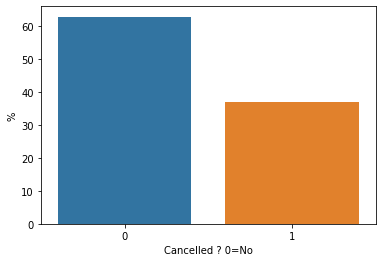

In [13]:
t=d['is_canceled'].value_counts()
x=t.index
y=(t/t.sum())*100
ax=sns.barplot(x,y)
ax.set(xlabel='Cancelled ? 0=No', ylabel="%")
plt.show()

Cancellation rate is high as almost 35-37% of the rooms booked where canceled

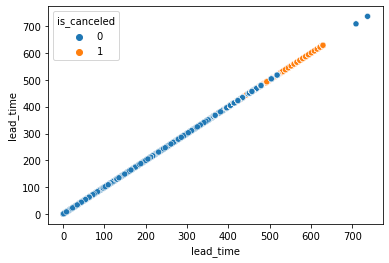

In [34]:
sns.scatterplot(x=d['lead_time'],y=d['lead_time'],hue=d['is_canceled'])

When lead time is greater than 500 its leading to cancellation of booking which is obvious 

**Let us analyse the bookings that are not canceled**

We need to drop all the rows in which bookings are cancelled as this would not help much 

In [14]:
nd = d[d['is_canceled'] == 0]

In [15]:
nd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Lets Check the market segment from which we are having bookings

In [16]:
t=nd['market_segment'].value_counts()
t

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


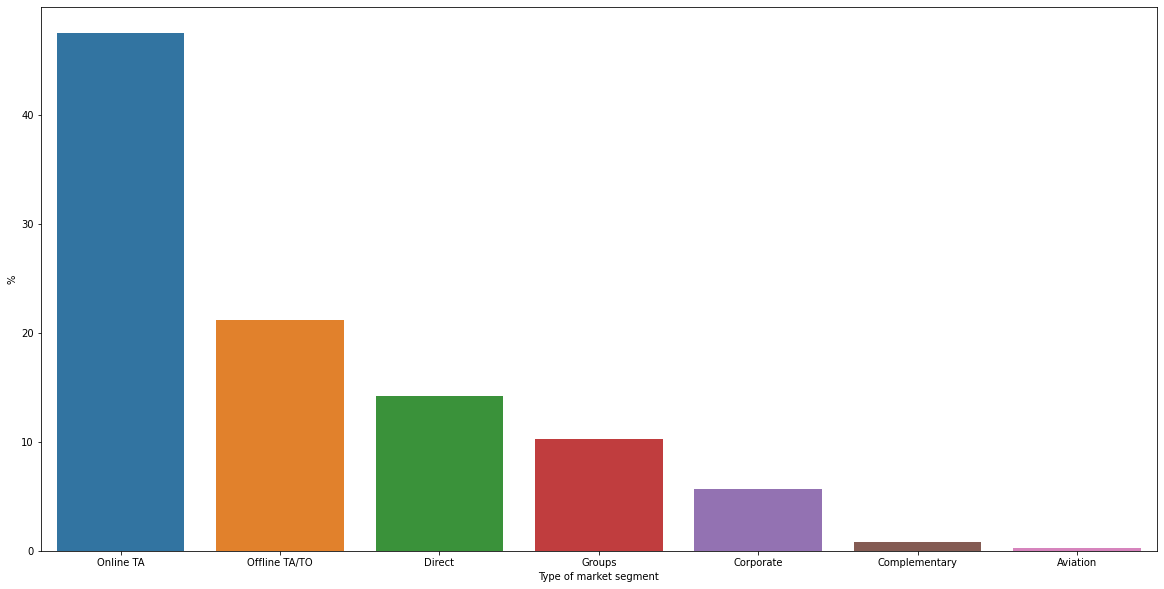

In [17]:
t=nd['market_segment'].value_counts()
x=t.index
y=(t/t.sum())*100
plt.figure(figsize=(20,10))
ax=sns.barplot(x,y)
ax.set(xlabel='Type of market segment', ylabel="%")
plt.show()

Majority of bookings are from online segment which is more than 45%

In [18]:
nd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Let us now check the type of customer booking

In [19]:
t=nd['customer_type'].value_counts()
t

Transient          52982
Transient-Party    18703
Contract            2810
Group                516
Name: customer_type, dtype: int64

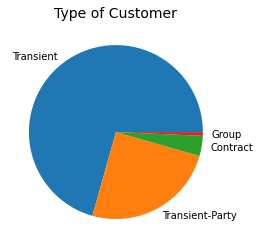

In [20]:
t=nd['customer_type'].value_counts()
x=t.index
y=(t/t.sum())*100
plt.title("Type of Customer", fontsize=14)
plt.pie(y,labels=x)
plt.show()

Transient customers have majority stake in total bookings of about 70%

Now let us check how many customer which earlier booked hotel are revisiting

In [21]:
t=nd['is_repeated_guest'].value_counts()
t

0    71806
1     3205
Name: is_repeated_guest, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


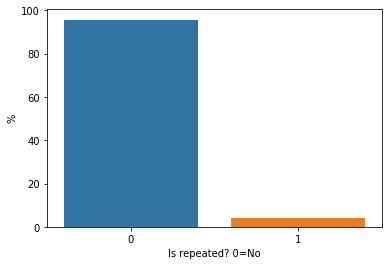

In [22]:
t=nd['is_repeated_guest'].value_counts()
x=t.index
y=(t/t.sum())*100
ax=sns.barplot(x,y)
ax.set(xlabel='Is repeated? 0=No', ylabel="%")
plt.show()

Almost all the people booking are not revisiting which is bad. Only 5-10% are repeating customers

Now let's check type of hotel which is preffered

In [23]:
t=nd['hotel'].value_counts()
t

City Hotel      46084
Resort Hotel    28927
Name: hotel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


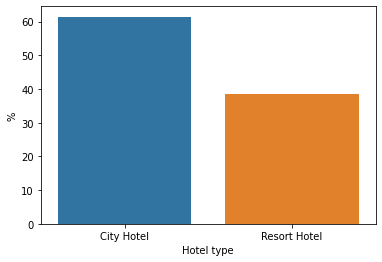

In [24]:
t=nd['hotel'].value_counts()
x=t.index
y=(t/t.sum())*100
ax=sns.barplot(x,y)
ax.set(xlabel='Hotel type', ylabel="%")
plt.show()

City hotel is mostly preffered by customers around 60%

Let's check number of bookings according to year

In [ ]:
t=nd['arrival_date_year'].value_counts()
t

2016    36299
2017    24886
2015    13826
Name: arrival_date_year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


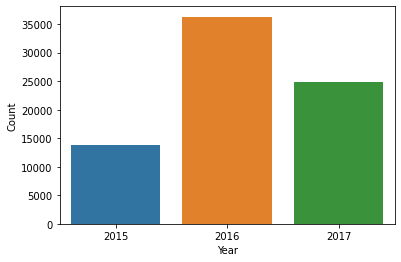

In [ ]:
t=nd['arrival_date_year'].value_counts()
x=t.index
y=t
ax=sns.barplot(x,y)
ax.set(xlabel='Year', ylabel="Count")
plt.show()

Year 2016 had maximum bookings around 35000

In [ ]:
nd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Lets analyze the country 

In [ ]:
t=nd['country'].value_counts()
t

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
MDG        1
SMR        1
ASM        1
BHS        1
DMA        1
Name: country, Length: 166, dtype: int64

Mamximum Bookings are from PRT(Portugal)

Let's analyze Booking trend in Month

In [ ]:
t=nd['arrival_date_month'].value_counts()
t

August       8624
July         7907
May          7103
October      6901
March        6620
April        6560
June         6395
September    6385
February     5359
November     4651
December     4391
January      4115
Name: arrival_date_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


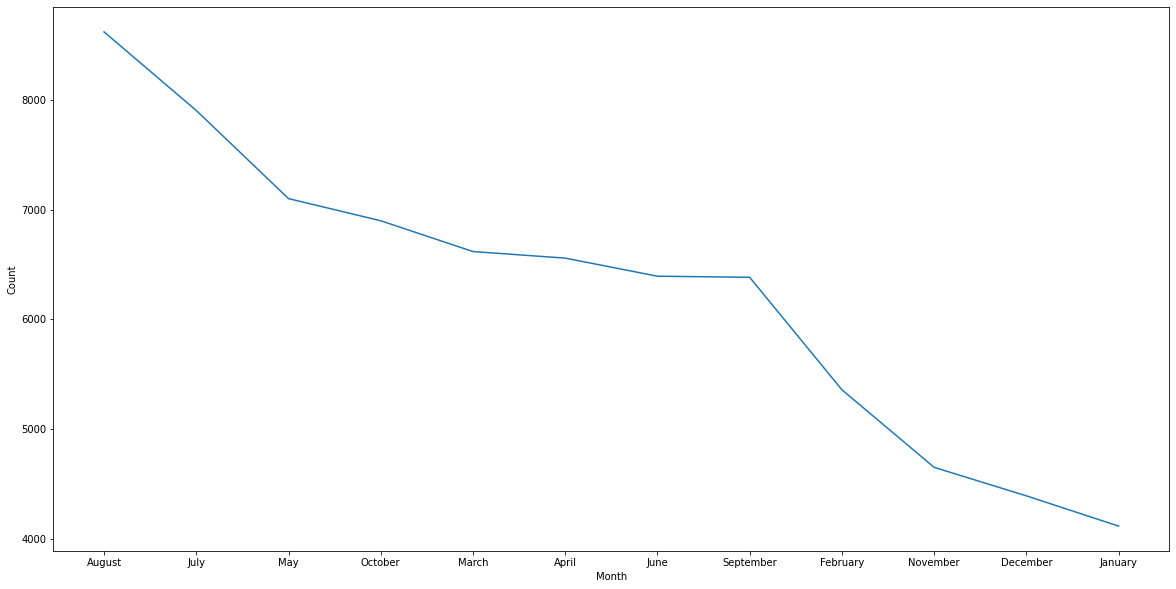

In [ ]:
t=nd['arrival_date_month'].value_counts()
x=t.index
y=t
plt.figure(figsize=(20,10))
# ploting lineplot
ax=sns.lineplot( x, y)
ax.set(xlabel='Month', ylabel="Count")
plt.show()

August is having the highest Number of bookings which can be due to holidays and January is having Lowest booking

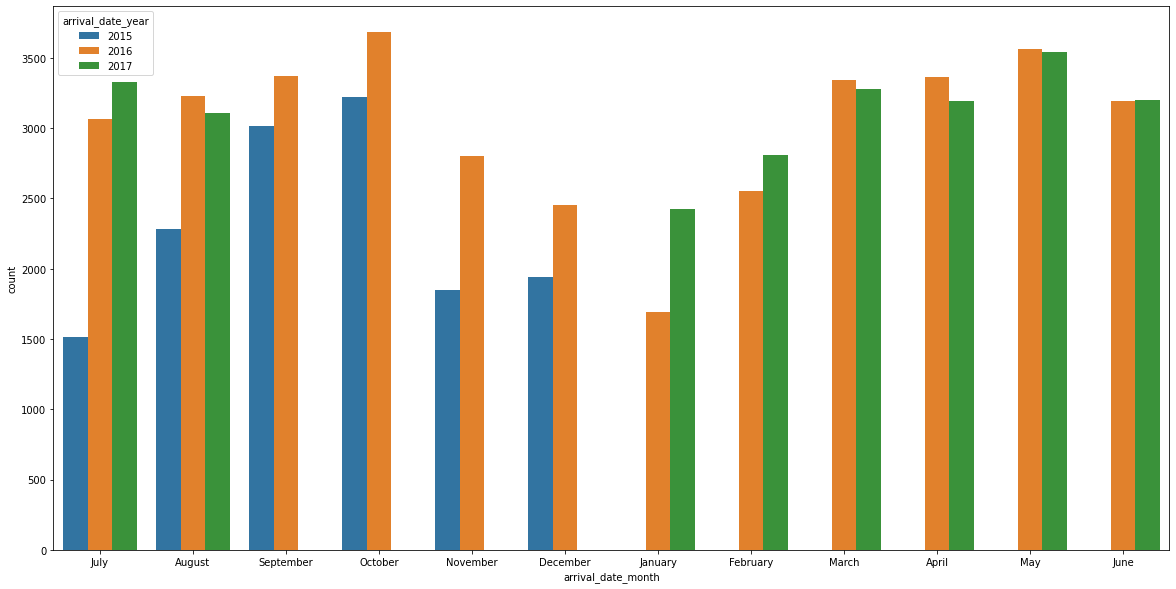

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(x='arrival_date_month', hue='arrival_date_year',  data=nd)




*   Month of August has maximum booking in three years. 
*   Month of July is showing Increasing trend year after year



In [ ]:
nd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


Let's analyze top 10 number of stay of people in the hotel

In [26]:
nd['Total_nights']=nd['stays_in_week_nights']+nd['stays_in_weekend_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
t=nd['Total_nights'].value_counts()
t[:10]

1     15734
3     15717
2     15471
4     11015
7      5679
5      5109
6      2316
10      779
8       714
14      656
Name: Total_nights, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


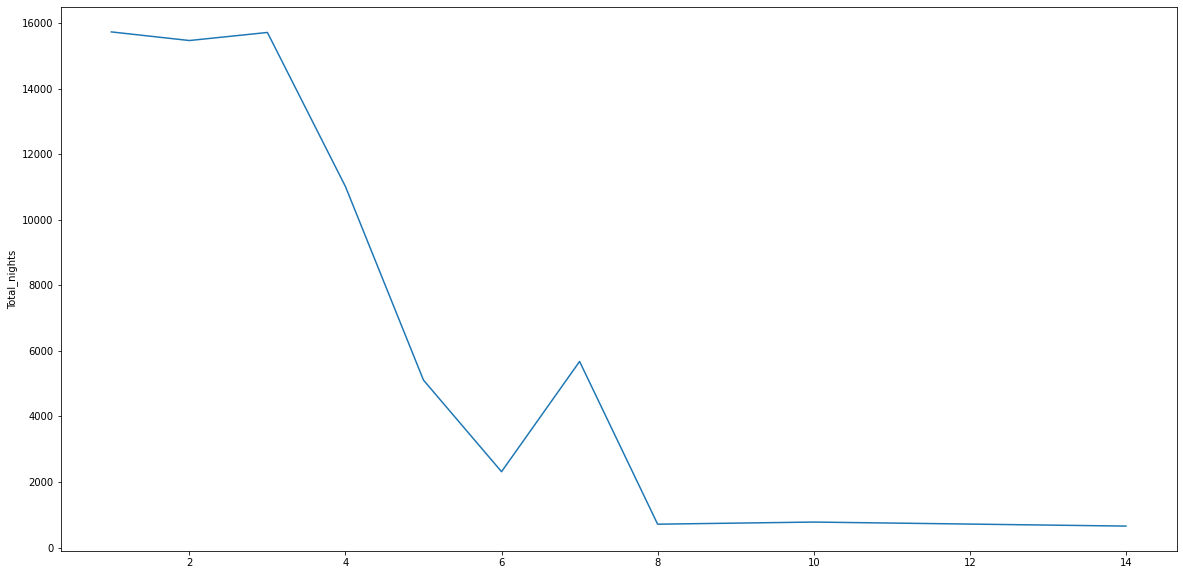

In [30]:
t=nd['Total_nights'].value_counts()
t=t[:10]
x=t.index
y=t
plt.figure(figsize=(20,10))
ax=sns.lineplot(x,y)
#ax.set(xlabel='No. of nights', ylabel="Count")
plt.show()

It is obvious as we had explored earlier that hotel has majority of transient customer hence bookings are moe for short interval stay of 1,2,3 days

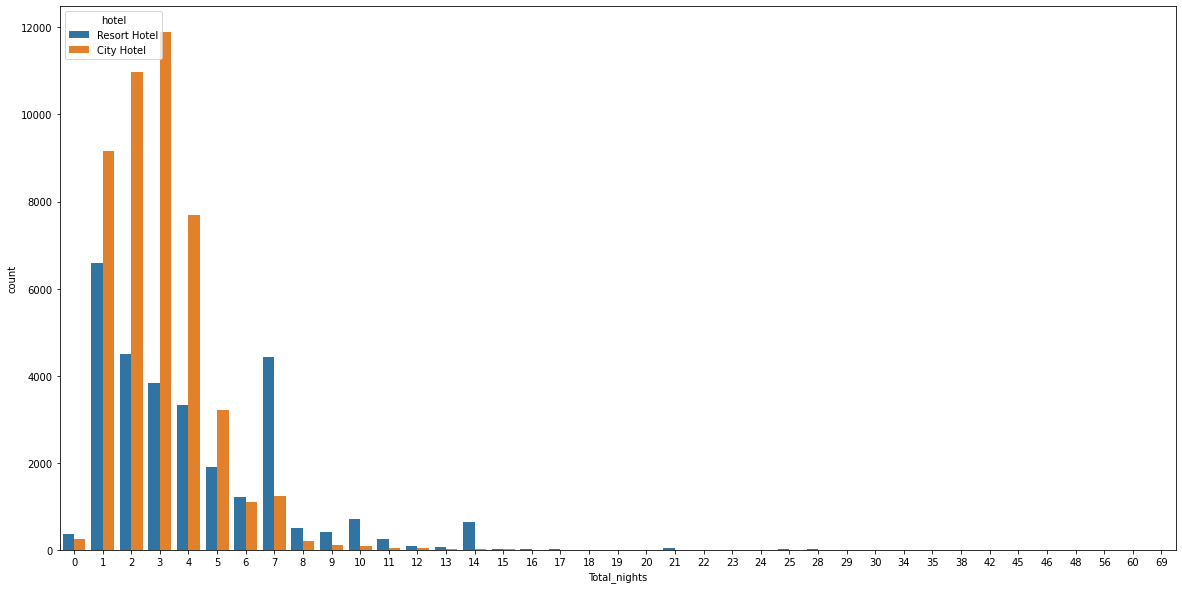

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Total_nights', hue='hotel',  data=nd)

From graph its clear that long staying gests(more than 6days) prefer Resort hotel over City Hotel

Let's analyze meal prefrence and type of hotel

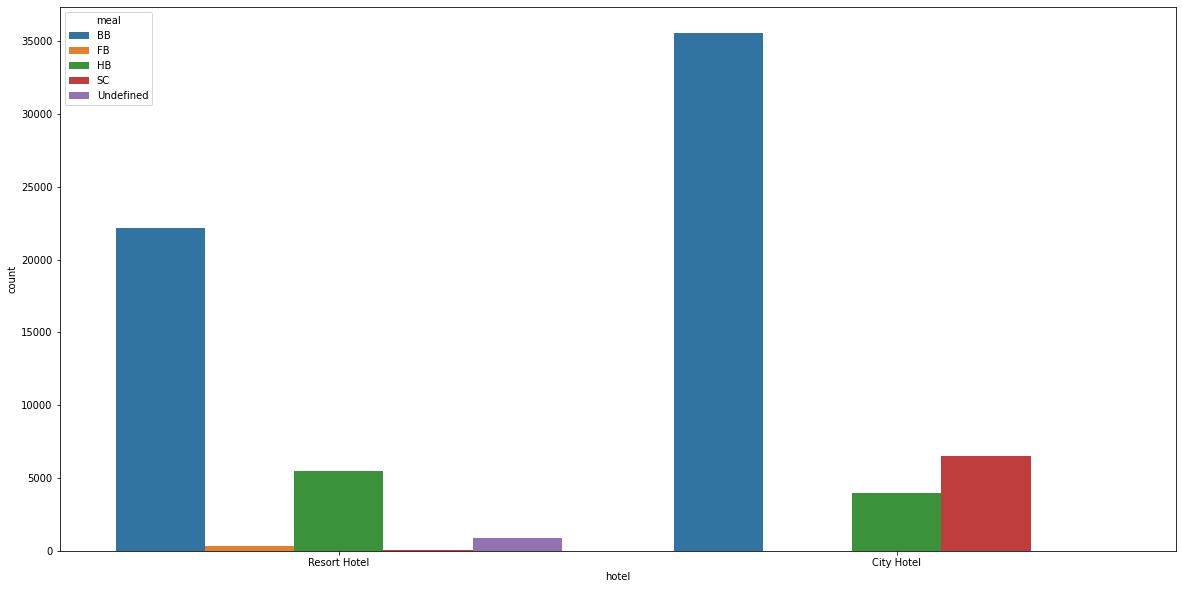

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(x='hotel', hue='meal',  data=nd)

**Let Us now analyze the data of canceled bookings**

In [31]:
cd = d[d['is_canceled'] == 1]

Let us see which type of customers are having maximum cancellation

In [35]:
t=cd['customer_type'].value_counts()
t

Transient          36494
Transient-Party     6385
Contract            1262
Group                 58
Name: customer_type, dtype: int64

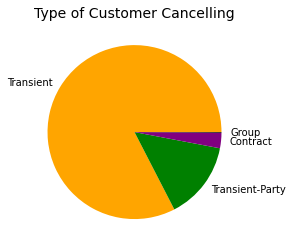

In [45]:
t=cd['customer_type'].value_counts()
x=t.index
y=(t/t.sum())*100
plt.title("Type of Customer Cancelling", fontsize=14)
plt.pie(y,labels=x,colors=["orange","green",'purple','black'])
plt.show()

More orders are cancelled by transient Customers it can be due to the increased lead time

In [44]:
t=cd['market_segment'].value_counts()
t

Online TA        20735
Groups           12094
Offline TA/TO     8302
Direct            1934
Corporate          991
Complementary       89
Aviation            52
Undefined            2
Name: market_segment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


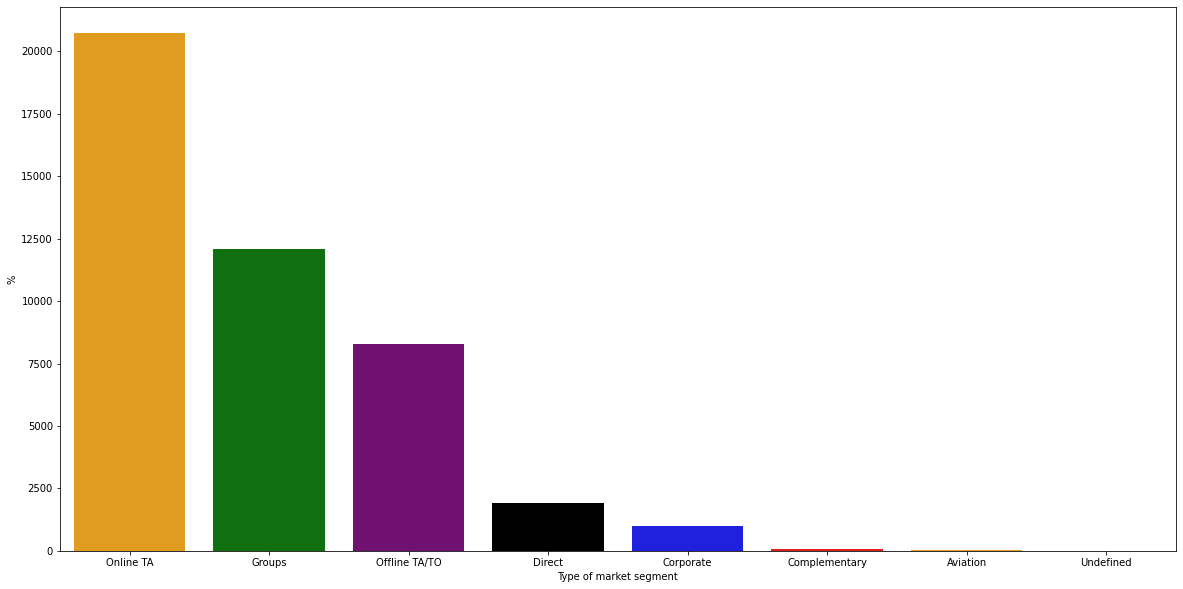

In [53]:
t=cd['market_segment'].value_counts()
x=t.index
y=t
plt.figure(figsize=(20,10))

ax=sns.barplot(x,y,palette=["orange","green",'purple','black','b','r'])
ax.set(xlabel='Type of market segment', ylabel="%")
plt.show()

Online TA is having Maximum Cancellation so there might be issue in website or landing page.

Let Us check which type of hotel is cancelled Maximum

In [54]:
t=cd['hotel'].value_counts()
t

City Hotel      33079
Resort Hotel    11120
Name: hotel, dtype: int64

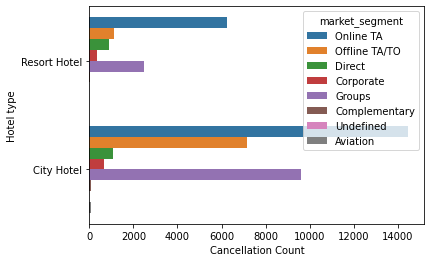

In [61]:
t=cd['hotel'].value_counts()
x=t
y=t.index
ax=sns.countplot(y='hotel',hue='market_segment',data=cd)
ax.set(ylabel='Hotel type', xlabel="Cancellation Count")
plt.show()



*   City Hotel has maximum cancellation in online which is obvious as resort hotel also is having maximum cancellation through online which can be due to issue in landing page or website 
*   But city hotal aslo is having high number of group cancellation which needs to be discussed

